In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
df= pd.read_csv("fraud.csv")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df['oldbalanceDest'].isna()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: oldbalanceDest, Length: 6362620, dtype: bool

In [6]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [8]:
# df = df[:-1]
# df.to_csv('/content/Fraud.csv',index=False)

In [9]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [10]:
# df=df.drop('isFlaggedFraud',axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
# df.isnull().sum()

In [11]:
df[df['isFlaggedFraud'].isna()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [12]:
print(df['type'].dtype)

object


In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.impute import SimpleImputer

df['nameOrig'] = df['nameOrig'].astype(str)
df['nameDest'] = df['nameDest'].astype(str)

df['oldbalanceOrg'] = pd.to_numeric(df['oldbalanceOrg'], errors='coerce')
df['newbalanceOrig'] = pd.to_numeric(df['newbalanceOrig'], errors='coerce')


df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce').fillna(0).astype(int)



imputer = SimpleImputer(strategy='mean')
df[['isFraud','isFlaggedFraud']] = imputer.fit_transform(df[['isFraud','isFlaggedFraud']])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 534.0+ MB


In [16]:
# prompt: convert nameOrig, nameDest, type into label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])
df['type'] = le.fit_transform(df['type'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int32(3), int64(1)
memory usage: 461.2 MB


In [20]:
#Now to remove outliers

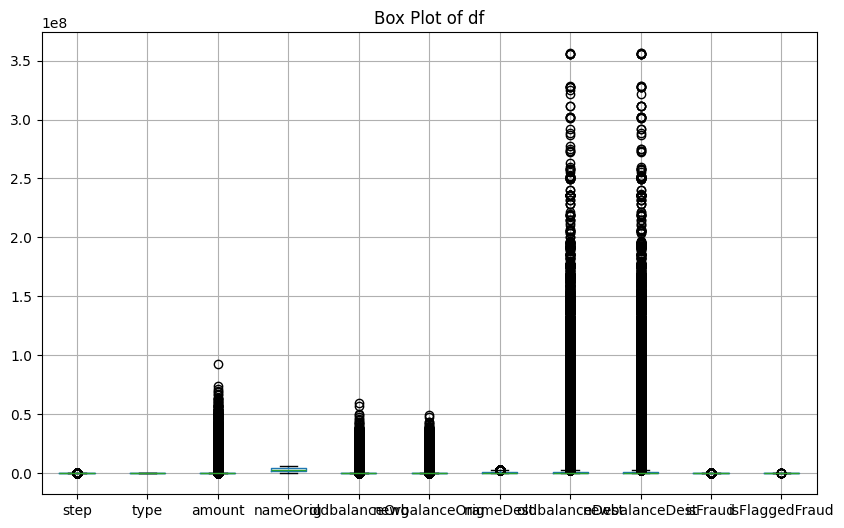

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot of df')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-1.703042,0.952399,-0.281560,-1.318825,-0.229810,-0.237622,1.220490,-0.323814,-0.333411,-0.035951,-0.001586
1,-1.703042,0.952399,-0.294767,-0.538520,-0.281359,-0.285812,1.316232,-0.323814,-0.333411,-0.035951,-0.001586
2,-1.703042,1.693076,-0.297555,-1.185630,-0.288654,-0.292442,-0.408856,-0.323814,-0.333411,27.815483,-0.001586
3,-1.703042,-0.528954,-0.297555,1.445742,-0.288654,-0.292442,-0.472820,-0.317582,-0.333411,27.815483,-0.001586
4,-1.703042,0.952399,-0.278532,0.146834,-0.274329,-0.282221,0.109953,-0.323814,-0.333411,-0.035951,-0.001586


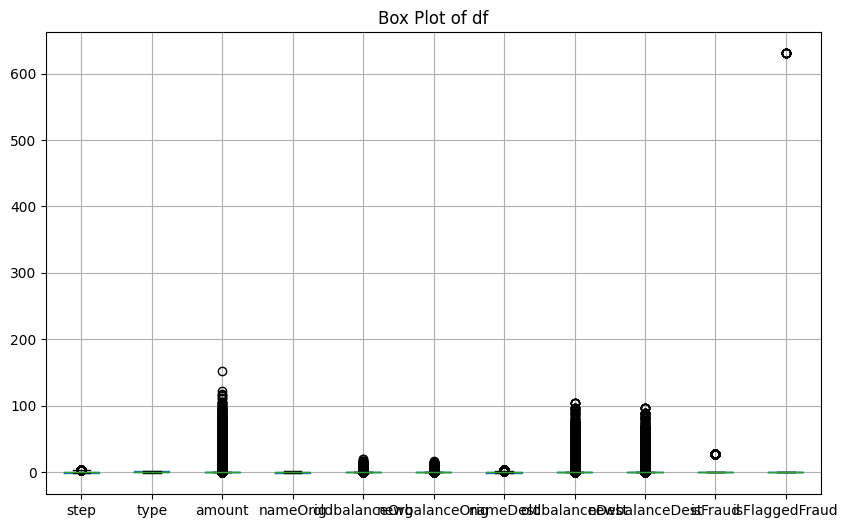

In [20]:
plt.figure(figsize=(10, 6))
df_scaled.boxplot()
plt.title('Box Plot of df')
plt.show()

In [21]:
# prompt: remove all outliers from df

def remove_outliers(df, columns):
  for col in columns:
    # Calculate the interquartile range (IQR)
    Q1 = np.percentile(df[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outlier_indices = df[((df[col] < lower_bound) | (df[col] > upper_bound))].index
    df = df.drop(outlier_indices)

  return df

# Columns to remove outliers from
columns_to_clean = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Remove outliers
df_clean = remove_outliers(df, columns_to_clean)

# Print the cleaned data frame
print(df_clean)


C:\Users\SOMIL GUPTA\AppData\Local\Temp\ipykernel_19656\1415486434.py:24: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df_clean = remove_outliers(df, columns_to_clean)


         step  type     amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
1           1     3    1864.28   2188998       21249.00        19384.72   
2           1     4     181.00   1002156         181.00            0.00   
3           1     1     181.00   5828262         181.00            0.00   
4           1     3   11668.14   3445981       41554.00        29885.86   
5           1     3    7817.71   6026525       53860.00        46042.29   
...       ...   ...        ...       ...            ...             ...   
6362605   742     1   54652.46   4495656       54652.46            0.00   
6362608   742     4  258355.42    741922      258355.42            0.00   
6362609   742     1  258355.42    370874      258355.42            0.00   
6362610   742     4   63416.99   5623928       63416.99            0.00   
6362611   742     1   63416.99   6336783       63416.99            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
1         1733924     

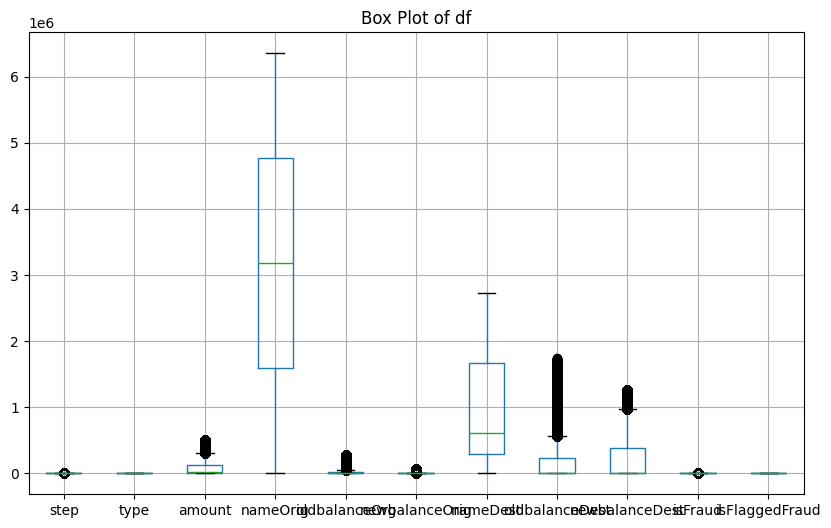

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_clean.boxplot()
plt.title('Box Plot of df')
plt.show()

Initial number of rows: 6362620
Initial shape: (6362620, 11)
After IQR filtering for amount, shape: (6024542, 11)
After IQR filtering for oldbalanceOrg, shape: (4963379, 11)
After IQR filtering for newbalanceOrig, shape: (4039718, 11)
After IQR filtering for oldbalanceDest, shape: (3504063, 11)
After IQR filtering for newbalanceDest, shape: (3251409, 11)
After Z-score filtering, shape: (2939452, 11)
Number of rows after outlier removal: 2939452


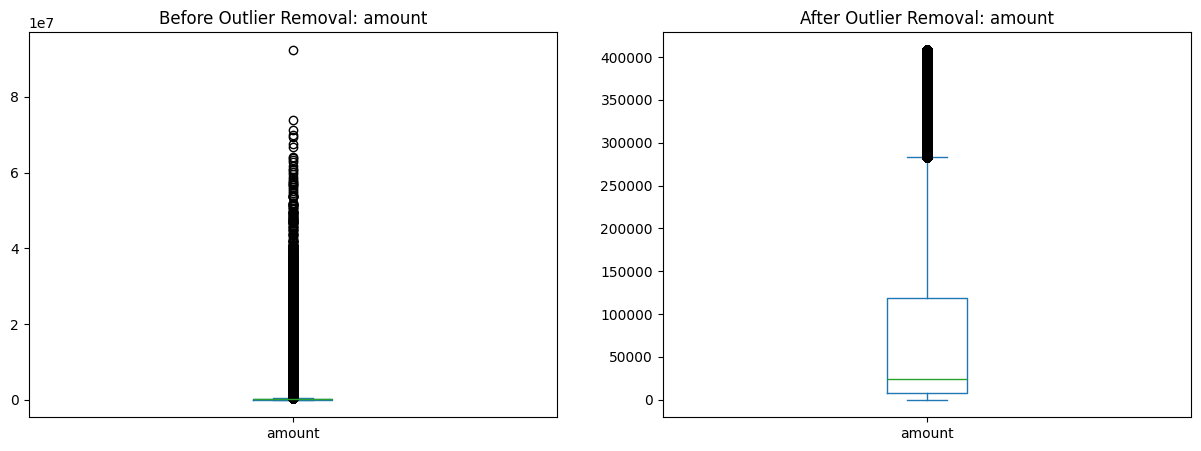

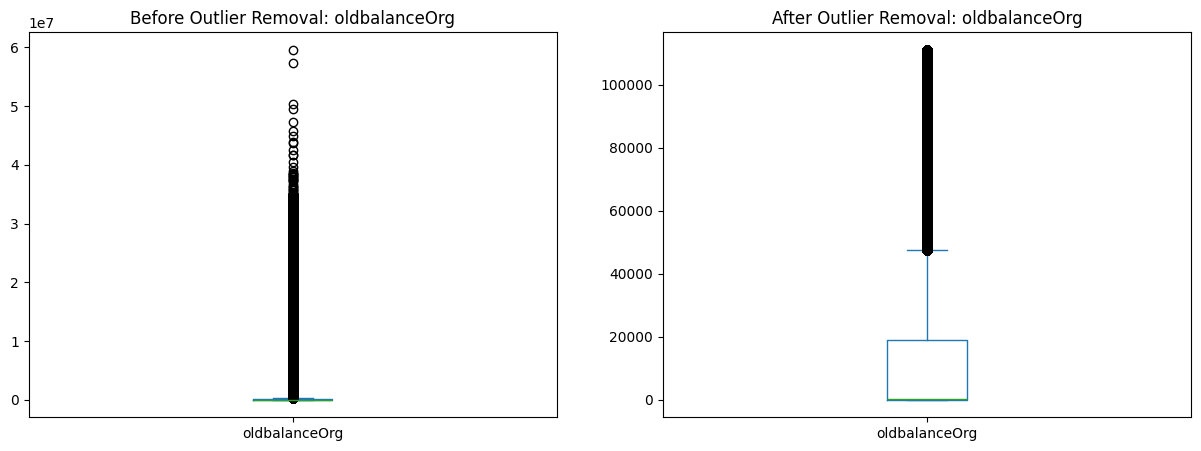

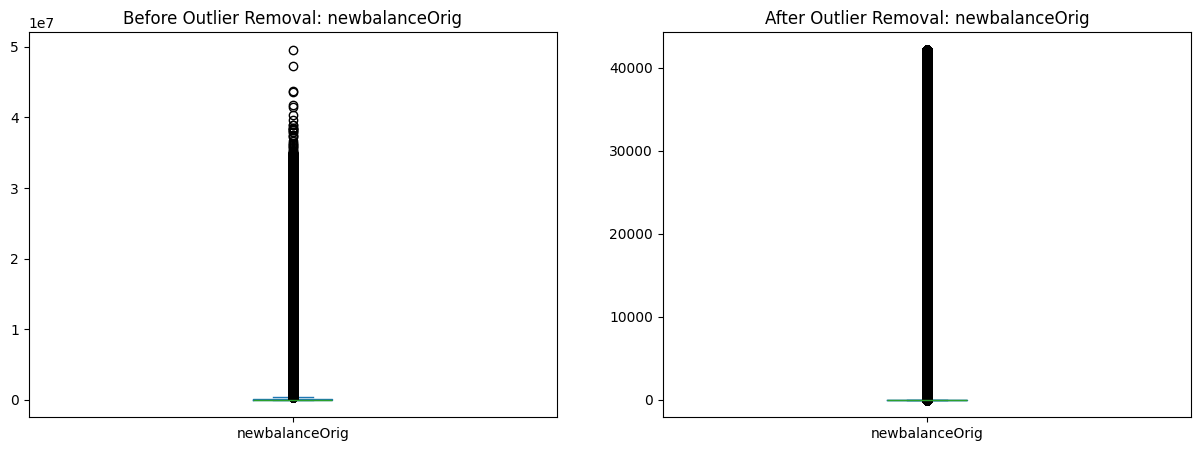

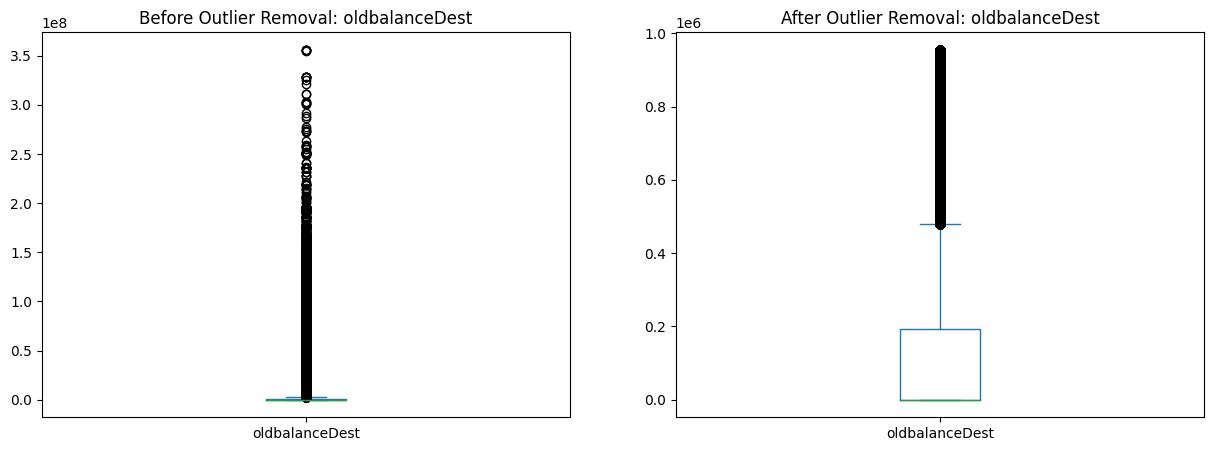

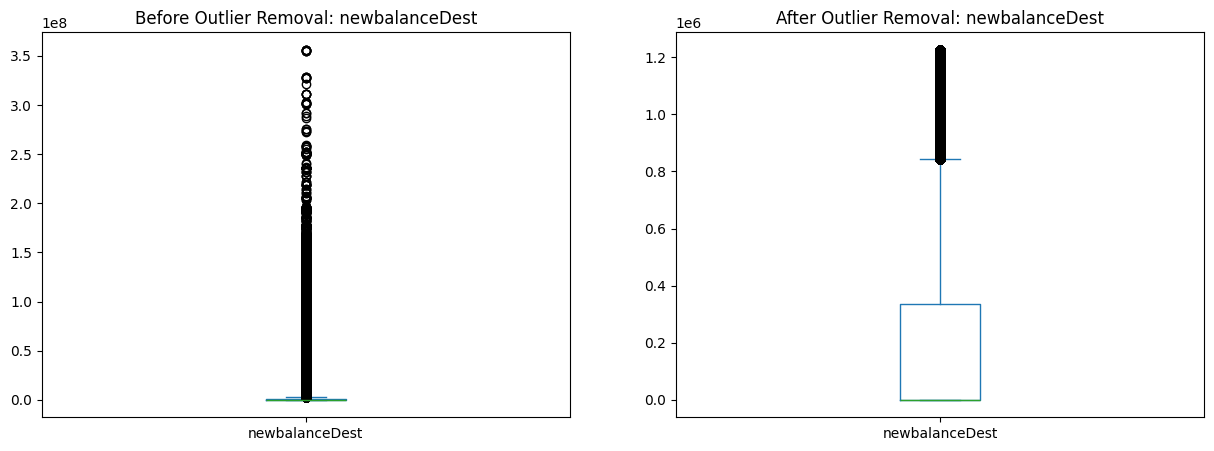

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

def remove_outliers_combined(df, columns, iqr_threshold=1.5, zscore_threshold=3):
    initial_shape = df.shape
    print(f"Initial shape: {initial_shape}")

    # IQR Method
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_threshold * IQR
        upper_bound = Q3 + iqr_threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"After IQR filtering for {col}, shape: {df.shape}")

    # Z-score Method
    z_scores = np.abs(df[columns].apply(zscore))
    df = df[(z_scores < zscore_threshold).all(axis=1)]
    print(f"After Z-score filtering, shape: {df.shape}")
    
    return df

# Define the columns to remove outliers from
columns_to_clean = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Ensure your dataset is loaded correctly
print(f"Initial number of rows: {df.shape[0]}")

# Remove outliers using the combined method
df_clean_combined = remove_outliers_combined(df, columns_to_clean)

# Verify the number of rows after cleaning
print(f"Number of rows after outlier removal: {df_clean_combined.shape[0]}")

# Visualize the data distribution before and after outlier removal
def plot_distributions(df_before, df_after, columns):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        df_before[col].plot(kind='box', ax=axes[0], title=f'Before Outlier Removal: {col}')
        df_after[col].plot(kind='box', ax=axes[1], title=f'After Outlier Removal: {col}')
        plt.show()

# Plot distributions
plot_distributions(df, df_clean_combined, columns_to_clean)


Making a Heatmap to show the correlation as well as selecting relavent features on the basis 

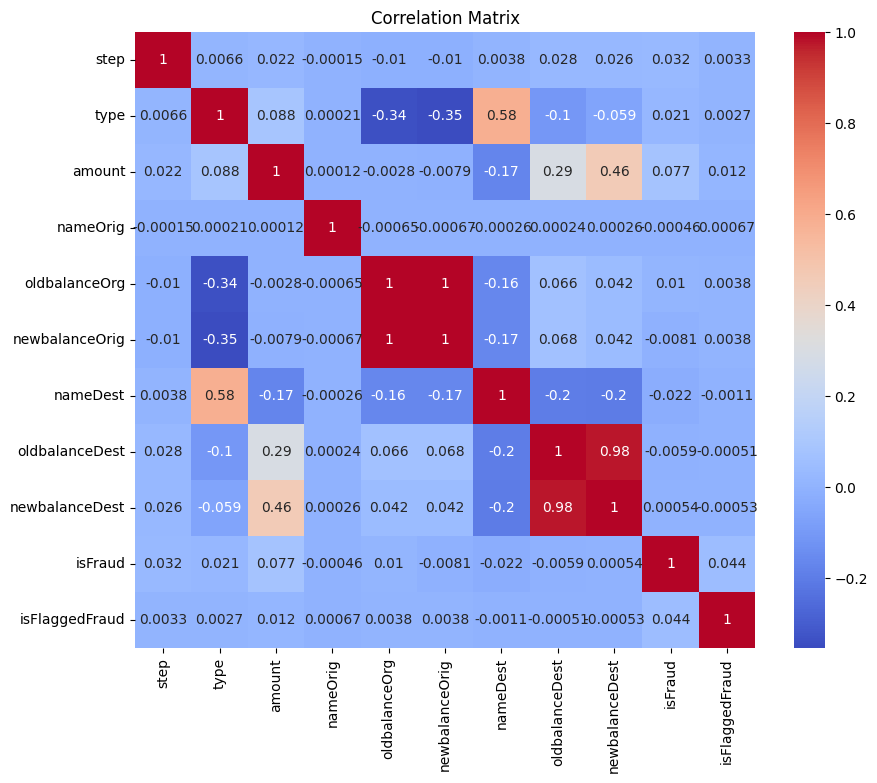

Selected Features:
Index(['step', 'type', 'amount', 'nameOrig', 'isFraud', 'isFlaggedFraud'], dtype='object')


In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
threshold = 0.15
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)
df_selected = df_clean_combined.drop(highly_correlated_features, axis=1)
print("Selected Features:")
print(df_selected.columns)

In [25]:
df_clean_combined.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0.0,0.0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1.0,0.0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1.0,0.0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0.0,0.0
8,1,3,4024.36,869140,2671.0,0.00,768940,0.0,0.0,0.0,0.0


In [26]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0.0    6362604
1.0         16
Name: count, dtype: int64

In [27]:
df['isFraud'].value_counts()

isFraud
0.0    6354407
1.0       8213
Name: count, dtype: int64

In [33]:
#DATA CLEANED

In [34]:
#NOW TO MAKE A DATA MODEL

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example: If you haven't encoded categorical variables yet
df_clean_combined = pd.get_dummies(df_clean_combined, drop_first=True)

# Ensuring that there are no missing values
df_clean_combined = df_clean_combined.dropna()

# Separate features and target
X = df_clean_combined.drop('isFraud', axis=1) 
y = df_clean_combined['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
# Initialized the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9997686645993901
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    587548
         1.0       0.99      0.61      0.75       343

    accuracy                           1.00    587891
   macro avg       1.00      0.80      0.88    587891
weighted avg       1.00      1.00      1.00    587891



In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_true = y_test,y_pred = y_pred)
print(cm)

[[587537     11]
 [   304     39]]


In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example: If you haven't encoded categorical variables yet
df_clean_combined = pd.get_dummies(df_clean_combined, drop_first=True)

# Ensure no missing values
df_clean_combined = df_clean_combined.dropna()

# Separate features and target
X = df_clean_combined.drop('isFraud', axis=1)  # Replace 'target_column' with your target column name
y = df_clean_combined['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize the XGBoost model
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)

# Train the model
model.fit(X_train, y_train, eval_metric='logloss')


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9998196944671717
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    587548
         1.0       0.96      0.72      0.82       343

    accuracy                           1.00    587891
   macro avg       0.98      0.86      0.91    587891
weighted avg       1.00      1.00      1.00    587891



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())


Cross-Validation Accuracy Scores: [0.9873599  0.99971934 0.99921414 0.99939785 0.99844529]
Mean CV Accuracy: 0.9968273020193447
Standard Deviation of CV Accuracy: 0.004752222467567452


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix

# Predict probabilities for AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


ROC AUC Score: 0.9993991781747065
F1 Score: 0.822742474916388
Precision: 0.9647058823529412
Recall: 0.717201166180758
Confusion Matrix:
 [[587539      9]
 [    97    246]]
